Holt's Winters in Python for Mondays at 8:00 PM for Submeter 1, Submeter 2, Submeter 3:

1. Obtain data and create dataframe of Mondays at 8:00 PM

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt



# Load Data

In [2]:
# obtain data

df = pd.read_csv('df2006_2010.csv', header=0)
df.head()

,Unnamed: 0,DateTime,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,quarter,month,week,weekday,day,date,hour,minute
0,1,2006-12-16 18:24:00,0,1,17,2006,4,12,50,Saturday,16,2006-12-16,18,24
1,2,2006-12-16 18:25:00,0,1,16,2006,4,12,50,Saturday,16,2006-12-16,18,25
2,3,2006-12-16 18:26:00,0,2,17,2006,4,12,50,Saturday,16,2006-12-16,18,26
3,4,2006-12-16 18:27:00,0,1,17,2006,4,12,50,Saturday,16,2006-12-16,18,27
4,5,2006-12-16 18:28:00,0,1,17,2006,4,12,50,Saturday,16,2006-12-16,18,28


In [3]:
df.describe(include = 'all')

,Unnamed: 0,DateTime,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,quarter,month,week,weekday,day,date,hour,minute
count,2.049280e+06,2049280,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2049280,2.049280e+06,2049280,2.049280e+06,2.049280e+06
unique,NaN,2049040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,1433,NaN,NaN
top,NaN,2009-10-25 02:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday,NaN,2010-10-31,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,295077,NaN,1500,NaN,NaN
mean,1.024640e+06,NaN,1.121923e+00,1.298520e+00,6.458447e+00,2.008425e+03,2.490377e+00,6.455223e+00,2.629452e+01,NaN,1.571190e+01,NaN,1.150028e+01,2.950043e+01
std,5.915763e+05,NaN,6.153031e+00,5.822026e+00,8.437154e+00,1.124344e+00,1.114130e+00,3.423177e+00,1.496217e+01,NaN,8.801285e+00,NaN,6.925675e+00,1.731790e+01
min,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,5.123208e+05,NaN,0.000000e+00,0.000000e+00,0.000000e+00,2.007000e+03,1.000000e+00,3.000000e+00,1.300000e+01,NaN,8.000000e+00,NaN,5.000000e+00,1.500000e+01
50%,1.024640e+06,NaN,0.000000e+00,0.000000e+00,1.000000e+00,2.008000e+03,2.000000e+00,6.000000e+00,2.600000e+01,NaN,1.600000e+01,NaN,1.200000e+01,3.000000e+01
75%,1.536960e+06,NaN,0.000000e+00,1.000000e+00,1.700000e+01,2.009000e+03,3.000000e+00,9.000000e+00,3.900000e+01,NaN,2.300000e+01,NaN,1.800000e+01,4.500000e+01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 14 columns):
Unnamed: 0        int64
DateTime          object
Sub_metering_1    int64
Sub_metering_2    int64
Sub_metering_3    int64
year              int64
quarter           int64
month             int64
week              int64
weekday           object
day               int64
date              object
hour              int64
minute            int64
dtypes: int64(11), object(3)
memory usage: 218.9+ MB


# Clean Data

In [5]:
# rename columns
df.rename(columns={
 'Unnamed: 0': 'rowNumber', 
 'Sub_metering_1': 'sub1', 
 'Sub_metering_2' : 'sub2',
 'Sub_metering_3' : 'sub3'}, inplace=True)

In [6]:
df.dtypes

rowNumber     int64
DateTime     object
sub1          int64
sub2          int64
sub3          int64
year          int64
quarter       int64
month         int64
week          int64
weekday      object
day           int64
date         object
hour          int64
minute        int64
dtype: object

## Prepare for Time Series Analysis

In [7]:
# Turn DateTime into Time Stamp
df['DateTime'] = pd.to_datetime(df['DateTime'])


#.tz_localize('Europe/Paris')

In [8]:
# Set DateTime as index
df = df.set_index('DateTime')
df.index=pd.DatetimeIndex(df.index).tz_localize('UTC').tz_convert('Europe/Paris')
df.head(3)

,rowNumber,sub1,sub2,sub3,year,quarter,month,week,weekday,day,date,hour,minute
DateTime,,,,,,,,,,,,,
2006-12-16 19:24:00+01:00,1,0,1,17,2006,4,12,50,Saturday,16,2006-12-16,18,24
2006-12-16 19:25:00+01:00,2,0,1,16,2006,4,12,50,Saturday,16,2006-12-16,18,25
2006-12-16 19:26:00+01:00,3,0,2,17,2006,4,12,50,Saturday,16,2006-12-16,18,26


## Remove Duplicate DateTime Stamps

source: https://stackoverflow.com/questions/22918212/fastest-way-to-drop-duplicated-index-in-a-pandas-dataframe

In [9]:
df = df.groupby(df.index).first()

## Missing Values

In [10]:
# Check for missing days

pd.date_range(start = '2006-12-16', end = '2010-11-26' ).difference(df.index)


DatetimeIndex(['2006-12-16', '2006-12-17', '2006-12-18', '2006-12-19',
               '2006-12-20', '2006-12-21', '2006-12-22', '2006-12-23',
               '2006-12-24', '2006-12-25',
               ...
               '2010-11-17', '2010-11-18', '2010-11-19', '2010-11-20',
               '2010-11-21', '2010-11-22', '2010-11-23', '2010-11-24',
               '2010-11-25', '2010-11-26'],
              dtype='datetime64[ns]', length=1442, freq=None)

In [11]:
pd.date_range(start = '2007-01-01', end = '2009-12-31' ).difference(df.index)


DatetimeIndex(['2007-01-01', '2007-01-02', '2007-01-03', '2007-01-04',
               '2007-01-05', '2007-01-06', '2007-01-07', '2007-01-08',
               '2007-01-09', '2007-01-10',
               ...
               '2009-12-22', '2009-12-23', '2009-12-24', '2009-12-25',
               '2009-12-26', '2009-12-27', '2009-12-28', '2009-12-29',
               '2009-12-30', '2009-12-31'],
              dtype='datetime64[ns]', length=1096, freq=None)

In [12]:
pd.set_option('display.max_rows', None)

In [13]:
missingDataRange = df.index.to_series().between('2007-04-28', '2007-05-01')

df[missingDataRange]

/Users/tasneemdawoodjee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default of the 'keep_tz' keyword in DatetimeIndex.to_series will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  """Entry point for launching an IPython kernel.


,rowNumber,sub1,sub2,sub3,year,quarter,month,week,weekday,day,date,hour,minute
DateTime,,,,,,,,,,,,,
2007-04-28 02:00:00+02:00,190348,0,0,17,2007,2,4,17,Saturday,28,2007-04-28,0,0
2007-04-28 02:01:00+02:00,190349,0,0,17,2007,2,4,17,Saturday,28,2007-04-28,0,1
2007-04-28 02:02:00+02:00,190350,0,0,16,2007,2,4,17,Saturday,28,2007-04-28,0,2
2007-04-28 02:03:00+02:00,190351,0,0,17,2007,2,4,17,Saturday,28,2007-04-28,0,3
2007-04-28 02:04:00+02:00,190352,0,0,16,2007,2,4,17,Saturday,28,2007-04-28,0,4
2007-04-28 02:05:00+02:00,190353,0,0,17,2007,2,4,17,Saturday,28,2007-04-28,0,5
2007-04-28 02:06:00+02:00,190354,0,0,16,2007,2,4,17,Saturday,28,2007-04-28,0,6
2007-04-28 02:07:00+02:00,190355,0,0,17,2007,2,4,17,Saturday,28,2007-04-28,0,7
2007-04-28 02:08:00+02:00,190356,0,0,16,2007,2,4,17,Saturday,28,2007-04-28,0,8


In [14]:
missingDataRange = df.index.to_series().between('2009-06-13', '2009-06-16')

df[missingDataRange]

/Users/tasneemdawoodjee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default of the 'keep_tz' keyword in DatetimeIndex.to_series will change to True in a future release. You can set 'keep_tz=True' to obtain the future behaviour and silence this warning.
  """Entry point for launching an IPython kernel.


,rowNumber,sub1,sub2,sub3,year,quarter,month,week,weekday,day,date,hour,minute
DateTime,,,,,,,,,,,,,
2009-06-13 02:00:00+02:00,1305094,2,0,1,2009,2,6,24,Saturday,13,2009-06-13,0,0
2009-06-13 02:01:00+02:00,1305095,1,0,0,2009,2,6,24,Saturday,13,2009-06-13,0,1
2009-06-13 02:02:00+02:00,1305096,1,0,1,2009,2,6,24,Saturday,13,2009-06-13,0,2
2009-06-13 02:03:00+02:00,1305097,1,0,1,2009,2,6,24,Saturday,13,2009-06-13,0,3
2009-06-13 02:04:00+02:00,1305098,1,0,0,2009,2,6,24,Saturday,13,2009-06-13,0,4
2009-06-13 02:05:00+02:00,1305099,1,0,1,2009,2,6,24,Saturday,13,2009-06-13,0,5
2009-06-13 02:06:00+02:00,1305100,2,0,0,2009,2,6,24,Saturday,13,2009-06-13,0,6
2009-06-13 02:07:00+02:00,1305101,1,0,1,2009,2,6,24,Saturday,13,2009-06-13,0,7
2009-06-13 02:08:00+02:00,1305102,1,0,1,2009,2,6,24,Saturday,13,2009-06-13,0,8


There is no data in 2007-2009 from:

- 2007-04-28 02:20:00 until 2007-04-30 16:24:00
- 2009-06-13 02:29:00 until 2009-06-15 09:35:00

While there is also missing data in 2006 and 2010, missing data can cause problems in time series, and for time series, I want to only look at complete years worth of data which we do not have for 2006 and 2010. 

There are several techniques for dealing with missing data. I choose to replace the missing values with the mode of the submeter values for that particular time period. For exampe, missing values at 8:00 PM on April 28, 2007 will be replaced with the mode of energy consumed for all days at 8:00 PM.  I could go further, and say for that weekday, and for that month, etc. , but I'd like to keep it simple. 

I will deal with missing values as I create dataframes filtered for these particular time periods. 


### 2007-2009 Dataframe

In [15]:
# Create dataframe without 2006 and 2010 since we don't have full year's data for those years
years = [2007, 2008,2009]
df.year.isin(years)

df0709= df[df.year.isin(years)]
df0709.shape


(1569714, 13)

In [16]:
df0709.year.value_counts()

2008    526845
2007    521609
2009    521260
Name: year, dtype: int64

### Mondays at 8:00 PM 2007-2009 Dataframe

In [17]:
# make dataframe for holt winters
## consists of mondays at 8:00 PM
### filter for weekday for Monday
#### filter hour for 20
#### filter minute for 1

mondays = df0709['weekday'] == 'Monday'
dfMondays8PM = df0709[mondays] 
hour8pm = dfMondays8PM['hour'] == 20
dfMondays8PM = dfMondays8PM[hour8pm] 
minute1 = dfMondays8PM['minute'] == 1
dfMondays8PM = dfMondays8PM[minute1] 

In [18]:
dfMondays8PM.head()

,rowNumber,sub1,sub2,sub3,year,quarter,month,week,weekday,day,date,hour,minute
DateTime,,,,,,,,,,,,,
2007-01-01 21:01:00+01:00,23134,0,0,18,2007,1,1,1,Monday,1,2007-01-01,20,1
2007-01-08 21:01:00+01:00,33214,0,1,17,2007,1,1,2,Monday,8,2007-01-08,20,1
2007-01-15 21:01:00+01:00,43293,0,0,17,2007,1,1,3,Monday,15,2007-01-15,20,1
2007-01-22 21:01:00+01:00,53373,0,36,0,2007,1,1,4,Monday,22,2007-01-22,20,1
2007-01-29 21:01:00+01:00,63452,0,0,17,2007,1,1,5,Monday,29,2007-01-29,20,1


I got lucky. No Mondays fall on the date ranges where we have missing data. 

#### Submeter 1: Mondays at 8:00 PM Dataframe

In [38]:
# create submeter 3, as time series object and set frequency
dfMondays8PM_sub1 = dfMondays8PM['sub1']
index = pd.date_range(start='2007-01-01 21:01:00+01:00', end='2009-12-28 21:01:00+01:00', freq='W-MON')
dfMondays8PM_sub1_ts = pd.Series(dfMondays8PM_sub1, index)

In [39]:
dfMondays8PM.sub1.value_counts()

0     153
37      2
1       2
Name: sub1, dtype: int64

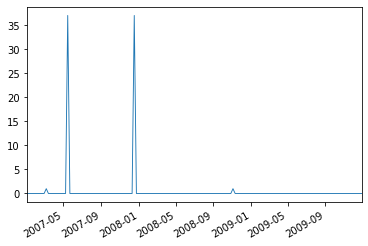

In [40]:
dfMondays8PM_sub1_ts.plot(linewidth=0.9);

##### Exponential Smoothing and Holt's Winters Models:

In [41]:
model = SimpleExpSmoothing(dfMondays8PM_sub1_ts)
fit = model.fit()
simple_fcast = fit.forecast(20).rename(r'$\alpha=%s$'%'smoothing_level')

In [42]:
model = Holt(dfMondays8PM_sub1_ts)
fit = model.fit()
holt_fcast = fit.forecast(20)

/Users/tasneemdawoodjee/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [43]:
model = Holt(dfMondays8PM_sub1_ts)
fit = model.fit(smoothing_level = 0.3,smoothing_slope = 0.05)
holt_fcast_smoothed = fit.forecast(20)

#optimized=True

#smoothing_level=.3, smoothing_slope=.05


In [44]:
model = Holt(dfMondays8PM_sub1_ts)
fit = model.fit(optimized=True)
holtOpt_fcast = fit.forecast(20)


#I'm not sure why optimization failed

/Users/tasneemdawoodjee/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Text(0.5, 1.0, "Holt's Exponential Smoothing")

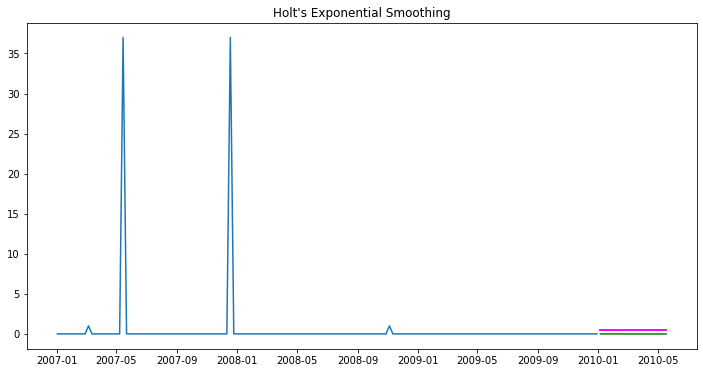

In [45]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dfMondays8PM_sub1_ts) # plot submeter 3
ax.plot(holt_fcast.index, holt_fcast.values, color="gray")
ax.plot(simple_fcast.index, simple_fcast.values, color="magenta")
ax.plot(holt_fcast_smoothed.index, holt_fcast_smoothed.values, color="green")
ax.plot(holtOpt_fcast.index, holtOpt_fcast.values, color="magenta")


plt.title("Holt's Exponential Smoothing")

Text(0.5, 1.0, "Holt's Exponential Smoothing")

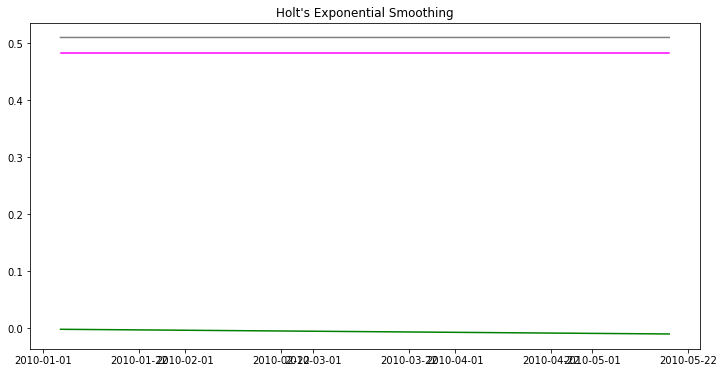

In [51]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(holt_fcast.index, holt_fcast.values, color="gray")
ax.plot(simple_fcast.index, simple_fcast.values, color="magenta")
ax.plot(holt_fcast_smoothed.index, holt_fcast_smoothed.values, color="green")
#ax.plot(pred.index, pred.values, color="magenta")


plt.title("Holt's Exponential Smoothing")

#### Submeter 2: Mondays at 8:00 PM Dataframe

In [60]:
# create submeter 3, as time series object and set frequency
dfMondays8PM_sub2 = dfMondays8PM['sub2']
index = pd.date_range(start='2007-01-01 21:01:00+01:00', end='2009-12-28 21:01:00+01:00', freq='W-MON')
dfMondays8PM_sub2_ts = pd.Series(dfMondays8PM_sub2, index)

In [61]:
dfMondays8PM.sub2.value_counts()

0     111
1      34
2      10
71      1
36      1
Name: sub2, dtype: int64

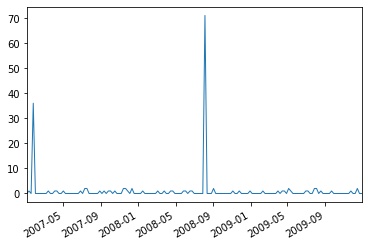

In [62]:
dfMondays8PM_sub2_ts.plot(linewidth=1);

##### Exponential Smoothing and Holt's Winters Models:

In [63]:
model = SimpleExpSmoothing(dfMondays8PM_sub2_ts)
fit = model.fit()
simple_fcast = fit.forecast(20).rename(r'$\alpha=%s$'%'smoothing_level')

In [64]:
model = Holt(dfMondays8PM_sub2_ts)
fit = model.fit()
holt_fcast = fit.forecast(20)

/Users/tasneemdawoodjee/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [65]:
model = Holt(dfMondays8PM_sub2_ts)
fit = model.fit(smoothing_level = 0.3,smoothing_slope = 0.05)
holt_fcast_smoothed = fit.forecast(20)

#optimized=True

#smoothing_level=.3, smoothing_slope=.05


In [66]:
model = Holt(dfMondays8PM_sub2_ts)
fit = model.fit(optimized=True)
holtOpt_fcast = fit.forecast(20)


#I'm not sure why optimization failed

/Users/tasneemdawoodjee/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Text(0.5, 1.0, "Holt's Exponential Smoothing")

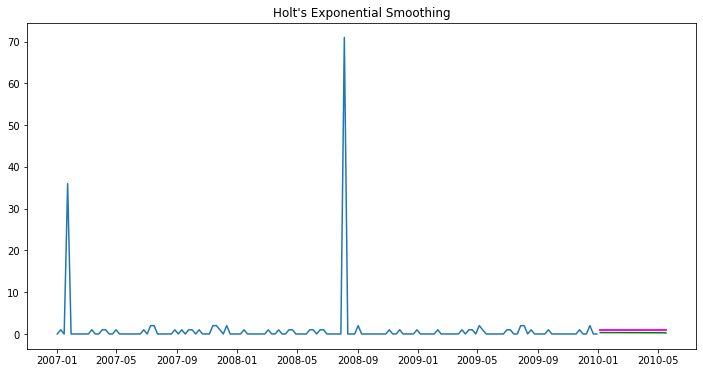

In [67]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dfMondays8PM_sub2_ts) # plot submeter 2
ax.plot(holt_fcast.index, holt_fcast.values, color="gray")
ax.plot(simple_fcast.index, simple_fcast.values, color="magenta")
ax.plot(holt_fcast_smoothed.index, holt_fcast_smoothed.values, color="green")
ax.plot(holtOpt_fcast.index, holtOpt_fcast.values, color="magenta")


plt.title("Holt's Exponential Smoothing")

Text(0.5, 1.0, "Holt's Exponential Smoothing")

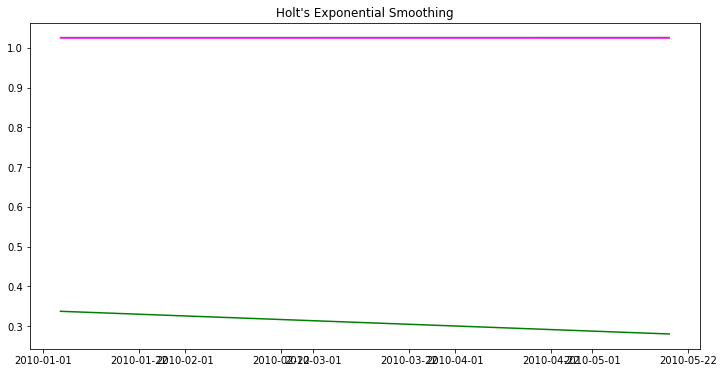

In [68]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(holt_fcast.index, holt_fcast.values, color="gray")
ax.plot(simple_fcast.index, simple_fcast.values, color="magenta")
ax.plot(holt_fcast_smoothed.index, holt_fcast_smoothed.values, color="green")
#ax.plot(pred.index, pred.values, color="magenta")


plt.title("Holt's Exponential Smoothing")

#### Submeter 3: Mondays at 8:00 PM Dataframe

In [23]:
# create submeter 3, as time series object and set frequency
dfMondays8PM_sub3 = dfMondays8PM['sub3']
index = pd.date_range(start='2007-01-01 21:01:00+01:00', end='2009-12-28 21:01:00+01:00', freq='W-MON')
dfMondays8PM_sub3_ts = pd.Series(dfMondays8PM_sub3, index)

In [24]:
dfMondays8PM.sub3.value_counts()

0     79
1     40
17    16
18    12
19     4
12     2
10     2
16     1
11     1
Name: sub3, dtype: int64

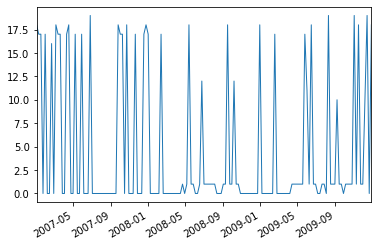

In [25]:
dfMondays8PM_sub3_ts.plot(linewidth=1);

##### Exponential Smoothing and Holt's Winters Models:

In [26]:
model = SimpleExpSmoothing(dfMondays8PM_sub3_ts)
fit = model.fit()
simple_fcast = fit.forecast(20).rename(r'$\alpha=%s$'%'smoothing_level')

In [27]:
model = Holt(dfMondays8PM_sub3_ts)
fit = model.fit()
holt_fcast = fit.forecast(20)

/Users/tasneemdawoodjee/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [28]:
model = Holt(dfMondays8PM_sub3_ts)
fit = model.fit(smoothing_level = 0.3,smoothing_slope = 0.05)
holt_fcast_smoothed = fit.forecast(20)

#optimized=True

#smoothing_level=.3, smoothing_slope=.05


In [29]:
model = Holt(dfMondays8PM_sub3_ts)
fit = model.fit(optimized=True)
holtOpt_fcast = fit.forecast(20)


#I'm not sure why optimization failed

/Users/tasneemdawoodjee/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Text(0.5, 1.0, "Holt's Exponential Smoothing")

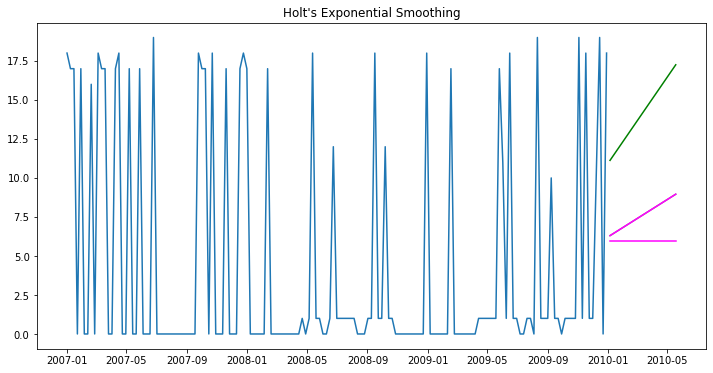

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dfMondays8PM_sub3_ts) # plot submeter 3
ax.plot(holt_fcast.index, holt_fcast.values, color="gray")
ax.plot(simple_fcast.index, simple_fcast.values, color="magenta")
ax.plot(holt_fcast_smoothed.index, holt_fcast_smoothed.values, color="green")
ax.plot(holtOpt_fcast.index, holtOpt_fcast.values, color="magenta")


plt.title("Holt's Exponential Smoothing")

Text(0.5, 1.0, "Holt's Exponential Smoothing")

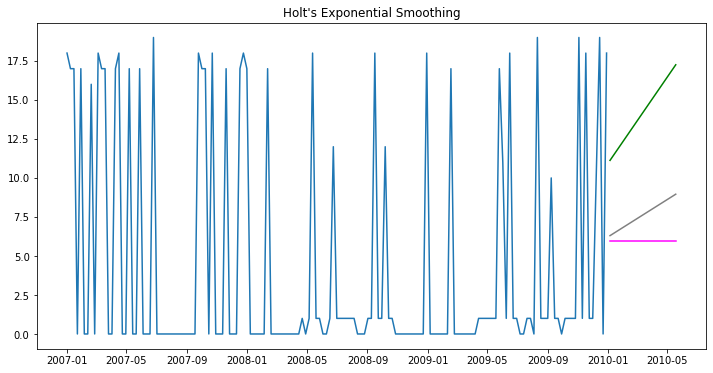

In [37]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dfMondays8PM_sub3_ts) # plot submeter 3
ax.plot(holt_fcast.index, holt_fcast.values, color="gray")
ax.plot(simple_fcast.index, simple_fcast.values, color="magenta")
ax.plot(holt_fcast_smoothed.index, holt_fcast_smoothed.values, color="green")
#ax.plot(pred.index, pred.values, color="magenta")


plt.title("Holt's Exponential Smoothing")

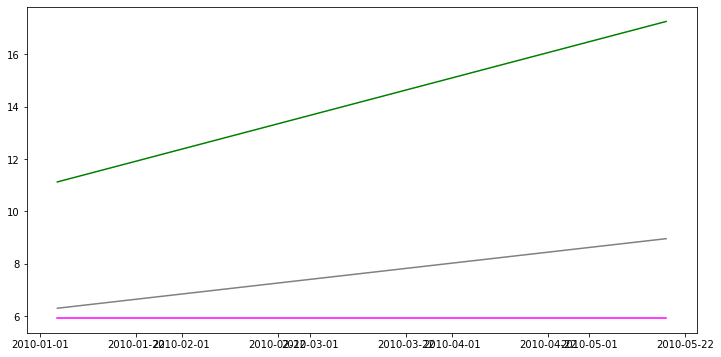

In [36]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(holt_fcast.index, holt_fcast.values, color="gray")
ax.plot(simple_fcast.index, simple_fcast.values, color="magenta")
ax.plot(holt_fcast_smoothed.index, holt_fcast_smoothed.values, color="green")

#### Arima Models:

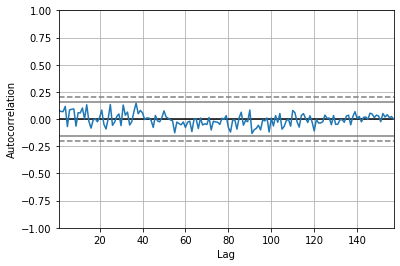

In [33]:
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
 
autocorrelation_plot(dfMondays8PM_sub3_ts)
pyplot.show()

# Holt Winters Predictions

In [34]:
# use 2007 to 2009 data to predict next 20 weeks in 2010 
# 20 weeks = 7*20 = next 140 days

## Submeter 3